Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8199 - loss: 0.5769 - val_accuracy: 0.9823 - val_loss: 0.0579
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9759 - loss: 0.0815 - val_accuracy: 0.9882 - val_loss: 0.0397
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9847 - loss: 0.0522 - val_accuracy: 0.9887 - val_loss: 0.0369
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9873 - loss: 0.0439 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.9907 - val_loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9872 - loss: 0.0368



Test Accuracy: 0.9902


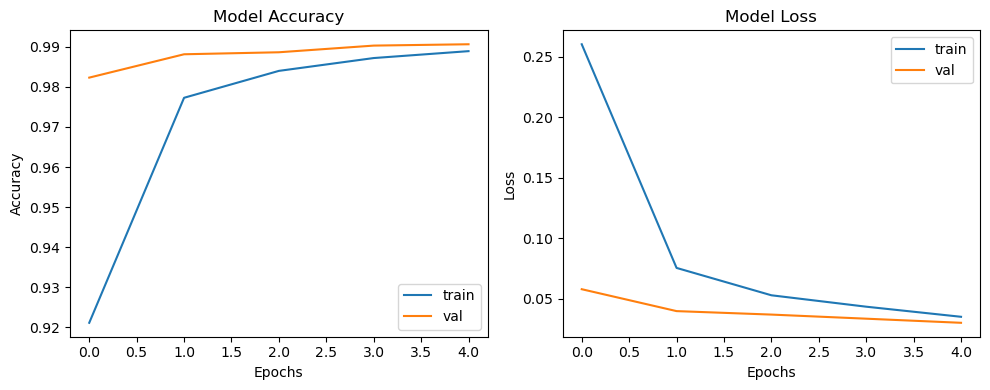

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


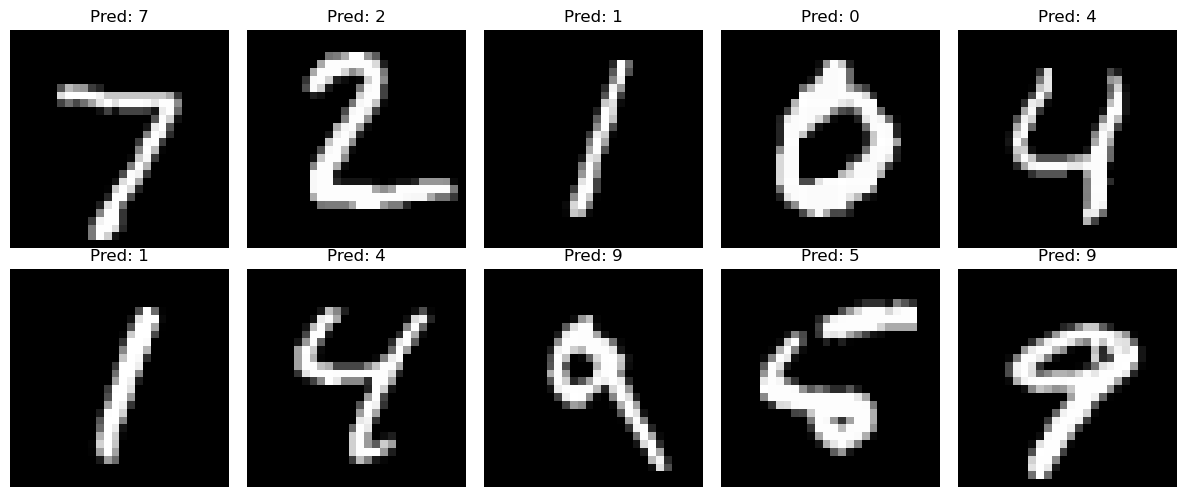

In [3]:
# 📌 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os
# Make sure the root-level images folder is created
os.makedirs('../images', exist_ok=True)

# 📌 Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 📌 Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# 📌 Reshape to include channel dimension (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# 📌 One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 📌 Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 📌 Train Model
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=5, batch_size=128)

# 📌 Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 📌 Save model
model.save("../models/mnist_cnn_model.h5")

# 📌 Plot Accuracy & Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("../images/accuracy_loss_plot.png")
plt.show()

# 📌 Predict & Visualize
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Show sample predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig("../images/sample_prediction.png")
plt.show()
